In [ ]:
# importing necessary libraries
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

# reading the file 
df = pd.read_csv("listings.csv")

# dropping unnecessary columns 
df_imp = df.drop(df.iloc[:, 1:10], axis=1)
df_imp = df_imp.drop(df_imp.columns[[2, 3, 11, 12, 13, 14, 15, 16, 17, 18]], axis=1)

# data understanding
print(df_imp.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24886 entries, 0 to 24885
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      24885 non-null  object 
 1   neighbourhood_cleansed  24881 non-null  object 
 2   property_type           24881 non-null  object 
 3   room_type               24881 non-null  object 
 4   accommodates            24881 non-null  float64
 5   bathrooms_text          24828 non-null  object 
 6   bedrooms                23512 non-null  float64
 7   beds                    24629 non-null  float64
 8   price                   24880 non-null  object 
 9   reviews_per_month       17213 non-null  float64
dtypes: float64(4), object(6)
memory usage: 1.9+ MB
None


In [ ]:
# first 5 rows of the dataset
df_imp.head()

,id,neighbourhood_cleansed,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,price,reviews_per_month
0,15965441,Cocotá,Private room in rental unit,Private room,2.0,1 bath,1.0,1.0,$150.00,NaN
1,47908784,Freguesia (Jacarepaguá),Entire condo,Entire home/apt,4.0,2 baths,2.0,2.0,$450.00,NaN
2,52239613,Curicica,Entire rental unit,Entire home/apt,5.0,1 bath,2.0,5.0,$350.00,1.16
3,10445855,Vila Militar,Entire home,Entire home/apt,3.0,1 bath,1.0,2.0,$145.00,0.64
4,5.65405E+17,Del Castilho,Private room in bed and breakfast,Private room,4.0,1.5 baths,2.0,3.0,$180.00,NaN


# **Data Cleaning:**

In [ ]:
# correcting index 
df_imp.index += 1 

# determining the number of missing values for every column
print("The number of missing values in each column are:")
print(df_imp.isnull().sum())

The number of missing values in each column are:
id                           1
neighbourhood_cleansed       5
property_type                5
room_type                    5
accommodates                 5
bathrooms_text              58
bedrooms                  1374
beds                       257
price                        6
reviews_per_month         7673
dtype: int64


In [ ]:
# filling missing values in numerical columns using fillna()
df_imp['accommodates'].fillna(0, inplace = True)
df_imp['bedrooms'].fillna(0, inplace = True)
df_imp['beds'].fillna(0, inplace = True)
df_imp['price'].fillna(0, inplace = True)
df_imp['reviews_per_month'].fillna(0, inplace = True)

# filling missing values in text columns ussing fillna()
df_imp["neighbourhood_cleansed"].fillna("Unknown", inplace = True)
df_imp["property_type"].fillna("Unknown", inplace = True)
df_imp["room_type"].fillna("Unknown", inplace = True)
df_imp["bathrooms_text"].fillna("Unkown", inplace = True)

print(df_imp.isnull().sum())

id                        1
neighbourhood_cleansed    0
property_type             0
room_type                 0
accommodates              0
bathrooms_text            0
bedrooms                  0
beds                      0
price                     0
reviews_per_month         0
dtype: int64


In [ ]:
# checking the data type of all the columns
print("The original data type of each column is:")
print(df_imp.dtypes)

# removing the '$' and ',' from the 'price' column and changing its data type 
replacement = {'\$':'', ',':''}
df_imp['price'] = (df_imp['price'].replace(replacement, regex = True).astype('float')) 

# changing data types of some columns from float to int
df_imp.accommodates = df_imp.accommodates.astype(int)
df_imp.bedrooms = df_imp.bedrooms.astype(int)
df_imp.beds = df_imp.beds.astype(int)

# renaming the 'price' column 
df_imp.rename(columns = {'price':'price($)'}, inplace = True)

print()
print("The corrected data type of each column is:")
print(df_imp.dtypes)

The original data type of each column is:
id                         object
neighbourhood_cleansed     object
property_type              object
room_type                  object
accommodates              float64
bathrooms_text             object
bedrooms                  float64
beds                      float64
price                      object
reviews_per_month         float64
dtype: object

The corrected data type of each column is:
id                         object
neighbourhood_cleansed     object
property_type              object
room_type                  object
accommodates                int64
bathrooms_text             object
bedrooms                    int64
beds                        int64
price($)                  float64
reviews_per_month         float64
dtype: object


# **Data Analysis and Visualization:**

In [ ]:
# finding the neighborhoods with highest number of listings 
df_imp_neighbourhood = 	df_imp.neighbourhood_cleansed.value_counts()

print("The top 5 neighbourhoods with highest number of listings are - ")
print()
print(df_imp_neighbourhood.nlargest(5))

# here we can see that "Copacabana" has the highest number of listings 

The top 5 neighbourhoods with highest number of listings are - 

Copacabana                  7360
Ipanema                     2531
Barra da Tijuca             2443
Leblon                      1213
Recreio dos Bandeirantes    1157
Name: neighbourhood_cleansed, dtype: int64


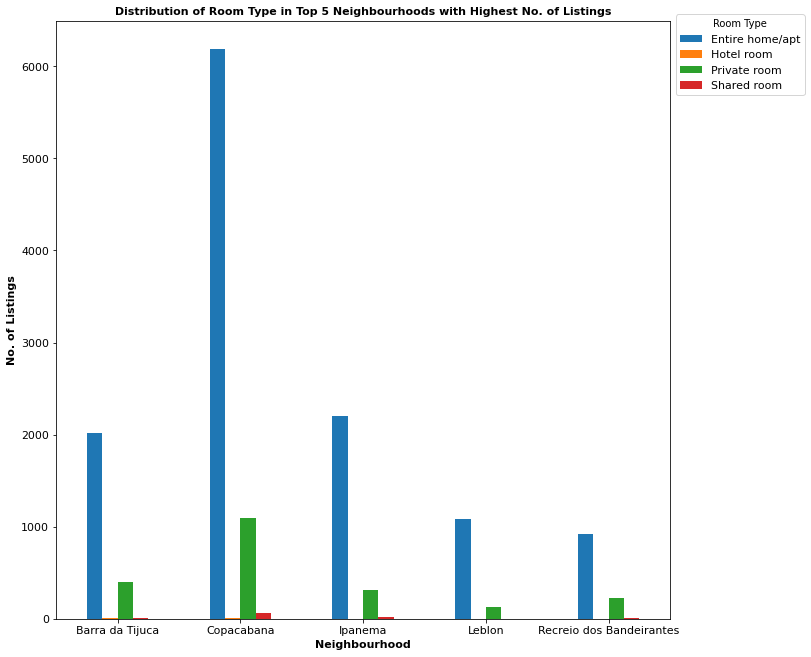

In [ ]:
# analyzing popular neighbourhoods 
df_imp_neighbourhood_room_type = df_imp.iloc[:, [0,1,3]]
df_imp_neighbourhood_room_type_top = df_imp_neighbourhood_room_type[df_imp_neighbourhood_room_type.neighbourhood_cleansed.isin(["Copacabana", "Ipanema", "Barra da Tijuca", "Leblon", "Recreio dos Bandeirantes"])]
df_imp_neighbourhood_room_type_top = df_imp_neighbourhood_room_type_top.groupby(['neighbourhood_cleansed','room_type']).size().reset_index(name = 'Count')
df_imp_neighbourhood_room_type_top = df_imp_neighbourhood_room_type_top.pivot(index = 'neighbourhood_cleansed', columns = 'room_type', values = 'Count')

# plotting the graph 
plot1 = df_imp_neighbourhood_room_type_top.plot(kind = 'bar', figsize = (11,11), fontsize = 11)
plt.xticks(rotation=0)
plot1.set_xlabel('Neighbourhood', fontsize=11, fontweight='bold')
plot1.set_ylabel('No. of Listings', fontsize=11, fontweight='bold')
plot1.set_title('Distribution of Room Type in Top 5 Neighbourhoods with Highest No. of Listings', fontsize=11, fontweight='bold')
plot1.legend(bbox_to_anchor=(1, 1.02), loc='upper left',fontsize=11, title = "Room Type")
plt.show()

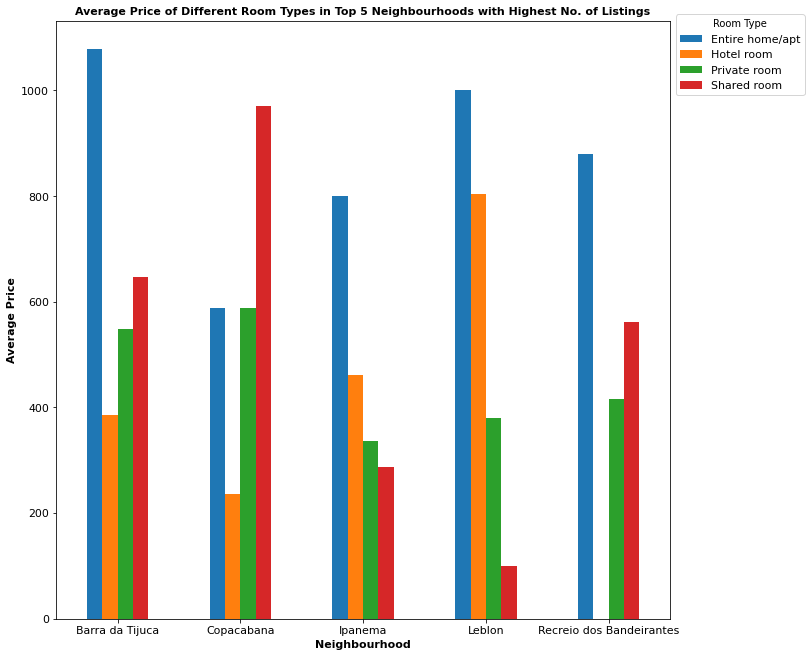

In [ ]:
# average price of listings in the top 5 neighbourhoods 
df_imp_neighbourhood_price_top = df_imp[df_imp.neighbourhood_cleansed.isin(["Copacabana", "Ipanema", "Barra da Tijuca", "Leblon", "Recreio dos Bandeirantes"])]
df_imp_neighbourhood_price_top = df_imp_neighbourhood_price_top.groupby(["neighbourhood_cleansed", 'room_type'], as_index=False).agg(avg_price = ("price($)","mean"))
df_imp_neighbourhood_price_top = df_imp_neighbourhood_price_top.pivot(index = 'neighbourhood_cleansed', columns = 'room_type', values = 'avg_price')

# plotting the graph
plot2 = df_imp_neighbourhood_price_top.plot(kind = 'bar', figsize = (11,11), fontsize = 11)
plt.xticks(rotation=0)
plot2.set_xlabel('Neighbourhood', fontsize=11, fontweight='bold')
plot2.set_ylabel('Average Price', fontsize=11, fontweight='bold')
plot2.set_title('Average Price of Different Room Types in Top 5 Neighbourhoods with Highest No. of Listings', fontsize=11, fontweight='bold')
plot2.legend(bbox_to_anchor=(1, 1.02), loc='upper left',fontsize=11, title = "Room Type")
plt.show()

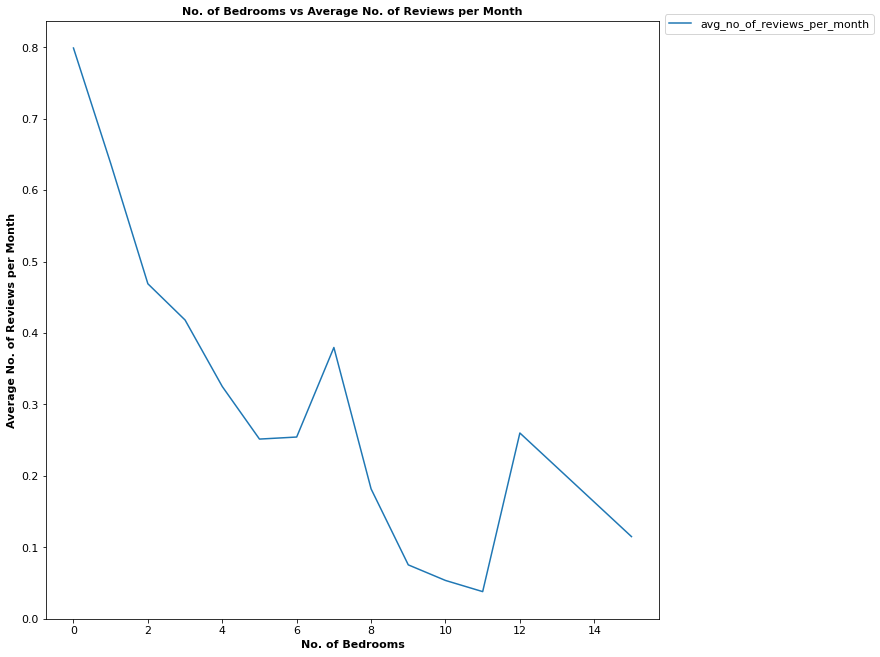

In [ ]:
# comparing size of the listing and avg no. of reviews 
df_imp_bedrms = df_imp.iloc[:, [0, 6, 8, 9]]

# considering the listings with bedrooms > 20 as outliers and ignoring them 
df_imp_bedrms = df_imp_bedrms.loc[df_imp_bedrms['bedrooms'] <= 15]
df_imp_bedrms = df_imp_bedrms.groupby(["bedrooms"], as_index=False).agg(avg_no_of_reviews_per_month = ("reviews_per_month","mean"), no_of_listings = ("reviews_per_month","count"))

# plotting a line graph to find the relationship between size of the listing and no. of reviews per month
plot3 = df_imp_bedrms.plot.line(x="bedrooms", y="avg_no_of_reviews_per_month", figsize = (11,11), fontsize = 11)
plt.xticks(rotation=0)
plot3.set_xlabel('No. of Bedrooms', fontsize=11, fontweight='bold')
plot3.set_ylabel('Average No. of Reviews per Month', fontsize=11, fontweight='bold')
plot3.set_title('No. of Bedrooms vs Average No. of Reviews per Month', fontsize=11, fontweight='bold')
plot3.legend(bbox_to_anchor=(1, 1.02), loc='upper left',fontsize=11)
plt.show()                           

# here we can see that as the size of the listing increases, avg no of reviews per month decreases, but at some points, the no. of reviews are increasing